#**Multiple Linear Regression Algorithm**
>Multiple linear regression refers to a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. 

>You can use mutiple linear regression when you want to know :
1.  How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2.  The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).


>**Equation for mutiple linear regression :**
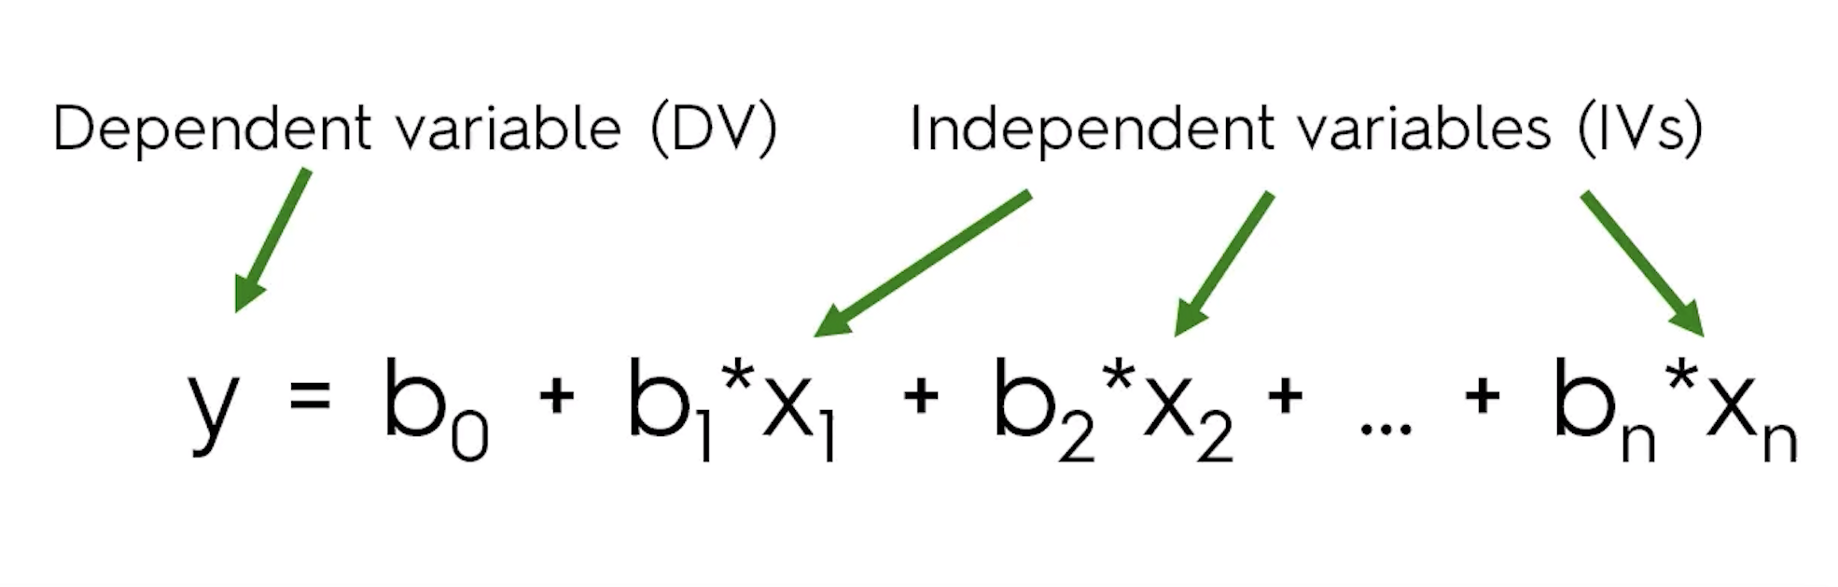

## **Importing Libraries :**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

##**1. Frist Model**
> In this model we study the relationship between the profit (DV) and all features (IV) and try to predict the profit (DV) depend on all features (IV).

In [ ]:
df_50_Startups = pd.read_csv('50_Startups.csv')

In [ ]:
df_50_Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df_50_Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df_50_Startups.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
42,23640.930000,96189.630000,148001.110000,California,71498.490000
49,0.000000,116983.800000,45173.060000,California,14681.400000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000
46,1315.460000,115816.210000,297114.460000,Florida,49490.750000
20,76253.860000,113867.300000,298664.470000,California,118474.030000


In [ ]:
df_50_Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


###**1. Handling Categorical Data**

In [ ]:
df_50_Startups = pd.get_dummies(df_50_Startups,columns=['State'],drop_first=True)

In [ ]:
df_50_Startups.sample(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
10,101913.080000,110594.110000,229160.950000,146121.950000,1,0
21,78389.470000,153773.430000,299737.290000,111313.020000,0,1
33,55493.950000,103057.490000,214634.810000,96778.920000,1,0
0,165349.200000,136897.800000,471784.100000,192261.830000,0,1
37,44069.950000,51283.140000,197029.420000,89949.140000,0,0


###**2. Detecting Inputs and Outputs**

In [ ]:
inputs = df_50_Startups.drop('Profit',axis=1)

In [ ]:
inputs

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.200000,136897.800000,471784.100000,0,1
1,162597.700000,151377.590000,443898.530000,0,0
2,153441.510000,101145.550000,407934.540000,1,0
3,144372.410000,118671.850000,383199.620000,0,1
4,142107.340000,91391.770000,366168.420000,1,0
5,131876.900000,99814.710000,362861.360000,0,1
6,134615.460000,147198.870000,127716.820000,0,0
7,130298.130000,145530.060000,323876.680000,1,0
8,120542.520000,148718.950000,311613.290000,0,1
9,123334.880000,108679.170000,304981.620000,0,0


In [ ]:
outputs = df_50_Startups['Profit']

In [ ]:
outputs

0    192261.830000
1    191792.060000
2    191050.390000
3    182901.990000
4    166187.940000
5    156991.120000
6    156122.510000
7    155752.600000
8    152211.770000
9    149759.960000
10   146121.950000
11   144259.400000
12   141585.520000
13   134307.350000
14   132602.650000
15   129917.040000
16   126992.930000
17   125370.370000
18   124266.900000
19   122776.860000
20   118474.030000
21   111313.020000
22   110352.250000
23   108733.990000
24   108552.040000
25   107404.340000
26   105733.540000
27   105008.310000
28   103282.380000
29   101004.640000
30    99937.590000
31    97483.560000
32    97427.840000
33    96778.920000
34    96712.800000
35    96479.510000
36    90708.190000
37    89949.140000
38    81229.060000
39    81005.760000
40    78239.910000
41    77798.830000
42    71498.490000
43    69758.980000
44    65200.330000
45    64926.080000
46    49490.750000
47    42559.730000
48    35673.410000
49    14681.400000
Name: Profit, dtype: float64

### **3. Spliting Data to Train and Test**

In [ ]:
from  sklearn.model_selection import train_test_split
inputs_train , inputs_test , outputs_train , outputs_test = train_test_split(inputs,outputs,test_size = 0.2,random_state = 5)

In [ ]:
inputs_train

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
31,61136.380000,152701.920000,88218.230000,0,1
4,142107.340000,91391.770000,366168.420000,1,0
32,63408.860000,129219.610000,46085.250000,0,0
0,165349.200000,136897.800000,471784.100000,0,1
23,67532.530000,105751.030000,304768.730000,1,0
5,131876.900000,99814.710000,362861.360000,0,1
48,542.050000,51743.150000,0.000000,0,1
34,46426.070000,157693.920000,210797.670000,0,0
37,44069.950000,51283.140000,197029.420000,0,0
26,75328.870000,144135.980000,134050.070000,1,0


In [ ]:
inputs_train.shape

(40, 5)

In [ ]:
inputs_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
42,23640.930000,96189.630000,148001.110000,0,0
29,65605.480000,153032.060000,107138.380000,0,1
6,134615.460000,147198.870000,127716.820000,0,0
19,86419.700000,153514.110000,0.000000,0,1
28,66051.520000,182645.560000,118148.200000,1,0
17,94657.160000,145077.580000,282574.310000,0,1
2,153441.510000,101145.550000,407934.540000,1,0
43,15505.730000,127382.300000,35534.170000,0,1
3,144372.410000,118671.850000,383199.620000,0,1
21,78389.470000,153773.430000,299737.290000,0,1


In [ ]:
inputs_test.shape

(10, 5)

In [ ]:
outputs_train

31    97483.560000
4    166187.940000
32    97427.840000
0    192261.830000
23   108733.990000
5    156991.120000
48    35673.410000
34    96712.800000
37    89949.140000
26   105733.540000
41    77798.830000
33    96778.920000
24   108552.040000
10   146121.950000
44    65200.330000
25   107404.340000
18   124266.900000
22   110352.250000
20   118474.030000
49    14681.400000
1    191792.060000
11   144259.400000
13   134307.350000
40    78239.910000
46    49490.750000
15   129917.040000
12   141585.520000
7    155752.600000
45    64926.080000
30    99937.590000
27   105008.310000
39    81005.760000
36    90708.190000
8    152211.770000
9    149759.960000
16   126992.930000
38    81229.060000
47    42559.730000
14   132602.650000
35    96479.510000
Name: Profit, dtype: float64

In [ ]:
outputs_train.shape

(40,)

In [ ]:
outputs_test

42    71498.490000
29   101004.640000
6    156122.510000
19   122776.860000
28   103282.380000
17   125370.370000
2    191050.390000
43    69758.980000
3    182901.990000
21   111313.020000
Name: Profit, dtype: float64

In [ ]:
outputs_test.shape

(10,)

### **4. Scalling Data**


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(inputs_train)
scalar.transform(inputs_train)

array([[-0.2097621 ,  1.3267113 , -1.09526504, -0.73379939,  1.62368828],
       [ 1.58790511, -0.965427  ,  1.28655732,  1.36277029, -0.61588176],
       [-0.15930991,  0.4488028 , -1.45631273, -0.73379939, -0.61588176],
       [ 2.10390652,  0.73585924,  2.19160361, -0.73379939,  1.62368828],
       [-0.06775873, -0.4285924 ,  0.76040853,  1.36277029, -0.61588176],
       [ 1.3607752 , -0.65052737,  1.25821832, -0.73379939,  1.62368828],
       [-1.55503997, -2.44772838, -1.85122838, -0.73379939,  1.62368828],
       [-0.53635132,  1.51334197, -0.04485219, -0.73379939, -0.61588176],
       [-0.58866044, -2.4649263 , -0.16283566, -0.73379939, -0.61588176],
       [ 0.10533079,  1.00646548, -0.70252093,  1.36277029, -0.61588176],
       [-0.94781286, -1.21520254, -0.44183911,  1.36277029, -0.61588176],
       [-0.33503185, -0.52929296, -0.01197081,  1.36277029, -0.61588176],
       [ 0.14340927, -0.67046792, -0.64660885, -0.73379939,  1.62368828],
       [ 0.69553699, -0.24752924,  0.1

In [ ]:
scalar.transform(inputs_test)

array([[-1.04221291, -0.78605444, -0.58297109, -0.73379939, -0.61588176],
       [-0.11054191,  1.3390539 , -0.93313371, -0.73379939,  1.62368828],
       [ 1.42157502,  1.12097454, -0.75679208, -0.73379939, -0.61588176],
       [ 0.35156254,  1.3570758 , -1.85122838, -0.73379939,  1.62368828],
       [-0.1006392 ,  2.44618277, -0.8387879 ,  1.36277029, -0.61588176],
       [ 0.53444554,  1.04166809,  0.57021918, -0.73379939,  1.62368828],
       [ 1.83953935, -0.60077265,  1.6444613 ,  1.36277029, -0.61588176],
       [-1.2228256 ,  0.38011321, -1.54672749, -0.73379939,  1.62368828],
       [ 1.63819279,  0.05446475,  1.43250179, -0.73379939,  1.62368828],
       [ 0.17328034,  1.36677072,  0.71729291, -0.73379939,  1.62368828]])

### **5. Create Model**

**Creation**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

**Training**

In [ ]:
linear_model.fit(inputs_train,outputs_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

In [ ]:
outputs_pred = linear_model.predict(inputs_test)

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
y_compare={'y_test':outputs_test, 'y_predicted':outputs_pred}
pd.DataFrame(y_compare)

,y_test,y_predicted
42,71498.490000,71126.076460
29,101004.640000,99884.573670
6,156122.510000,155529.856602
19,122776.860000,111888.619410
28,103282.380000,100729.257404
17,125370.370000,129237.338836
2,191050.390000,180769.049296
43,69758.980000,58721.670460
3,182901.990000,172004.567055
21,111313.020000,117163.932531


**Identifying Paramters in model**

In [ ]:
print('Slope (coefficeint) in the model :',list(linear_model.coef_))
print('--'*50)
print('Intercept Part from y-axis in the model :',linear_model.intercept_)

Slope (coefficeint) in the model : [0.7745460909694148, -0.01515271029784233, 0.03836368100368284, -790.4665793573248, -1316.0193392788406]
----------------------------------------------------------------------------------------------------
Intercept Part from y-axis in the model : 48594.75276656967


**The Model Equation is :**

>h(X) = 49401.61664366439 + X_1 * 0.7898796133966193 +  X_2 * 0.0013096873044096645 + X_3 * 0.026815886335357624 + X_4  *  -1239.2236254693394 + X_5 * -3605.885054868986

###**6. Evaluating Model**

In [ ]:
print('Training Score is : ' , linear_model.score(inputs_train, outputs_train))
print(' ------------------------------------------------------------')
print('Testing Score is : ' , linear_model.score(inputs_test, outputs_test))

Training Score is :  0.943850522642993
 ------------------------------------------------------------
Testing Score is :  0.9669763022157343


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
MAE = mean_absolute_error(outputs_test,outputs_pred)
MSE = mean_squared_error(outputs_test,outputs_pred)
medien_error = median_absolute_error(outputs_test,outputs_pred)

In [ ]:

print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 5746.045101053619
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 4858.940683454457
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 52228531.74326365
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 7226.931004462658



## **2. Second Model**

> In this model we study the relationship between the 	Yearly Amount Spent (DV) and all features (IV) and try to predict the Yearly Amount Spent (DV) depend on all features (IV)



In [ ]:
df_Ecommerce = pd.read_csv('/content/Ecommerce Customers.csv')

In [ ]:
df_Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df_Ecommerce.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df_Ecommerce.sample(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
146,david79@lopez-montes.com,"969 William Manor\nWest Sherry, MA 66282-2258",Purple,32.116400,12.380695,37.232003,3.089528,463.484995
144,francisgeorge@thomas.org,"27563 Vincent Lake\nAllenchester, DC 22159",Teal,33.924625,11.911416,38.274702,2.910038,460.061277
294,lschroeder@gmail.com,"93101 Shannon Common\nSouth Destiny, ND 30379-...",Ivory,33.770900,11.153966,37.240330,4.729485,557.634109
439,oliviamarshall@sawyer-sellers.com,Unit 5934 Box 9748\nDPO AA 37361-3043,Brown,33.918844,12.428737,37.305362,4.158215,565.994363
109,bakerdrew@gmail.com,39637 Griffin Plain Suite 691\nNew Deborahview...,Chartreuse,33.356874,13.452129,38.503009,3.318822,549.008227


In [ ]:
df_Ecommerce.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### **1. Detecting Inputs and Outputs**

In [ ]:
inputs = df_Ecommerce.drop(['Yearly Amount Spent','Email', 'Address' ,'Avatar'],axis = 1)
outputs = df_Ecommerce['Yearly Amount Spent']

In [ ]:
inputs

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [ ]:
outputs

0     587.951054
1     392.204933
2     487.547505
3     581.852344
4     599.406092
         ...    
495   573.847438
496   529.049004
497   551.620146
498   456.469510
499   497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

###**2. Spliting Data to Train and Test**

In [ ]:
from  sklearn.model_selection import train_test_split
inputs_train , inputs_test, outputs_train, outputs_test = train_test_split(inputs,outputs,test_size = 0.25)

In [ ]:
inputs_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
41,33.019548,10.634561,37.496690,4.646120
116,33.925795,12.011022,36.701052,2.753424
199,30.836433,13.100110,35.907721,3.361613
140,31.066218,11.735095,36.599374,3.958892
51,33.900224,10.956791,37.266878,2.952669
...,...,...,...,...
247,34.402410,14.220979,37.523197,4.077775
8,33.987773,13.386235,37.534497,3.273434
278,32.607903,13.677246,37.744700,2.871948
31,33.461056,10.869164,35.622442,3.471413


In [ ]:
inputs_train.shape

(375, 4)

In [ ]:
inputs_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
381,33.556556,12.960307,37.951946,3.345922
485,33.369381,12.222484,36.355235,3.447018
192,33.694898,11.202670,35.493964,4.015987
304,33.914015,12.266504,36.575031,3.023474
394,32.430839,13.887275,38.381956,3.772969
...,...,...,...,...
167,34.046638,12.474455,35.037856,4.055776
114,32.931336,12.732212,35.600821,5.485977
488,35.630854,12.125402,38.187764,4.019051
418,31.673916,12.329147,37.074371,3.982462


In [ ]:
inputs_test.shape

(125, 4)

In [ ]:
outputs_train

41    501.874430
116   479.231093
199   467.501900
140   448.933293
51    442.667252
         ...    
247   647.619456
8     570.200409
278   530.362469
31    447.687907
308   604.841319
Name: Yearly Amount Spent, Length: 375, dtype: float64

In [ ]:
outputs_train.shape

(375,)

In [ ]:
outputs_test

381   547.190749
485   515.502480
192   505.119638
304   494.687156
394   557.608262
         ...    
167   578.986259
114   642.101579
488   597.739879
418   475.725068
227   461.920877
Name: Yearly Amount Spent, Length: 125, dtype: float64

In [ ]:
outputs_test.shape

(125,)

###**3. Scalling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(inputs_train)
scalar.transform(inputs_train)

array([[-0.04653425, -1.43789496,  0.45597035,  1.13768389],
       [ 0.85238306, -0.07088191, -0.34187792, -0.75538353],
       [-2.21199283,  1.01073066, -1.13741284, -0.1470753 ],
       ...,
       [-0.45485019,  1.58390572,  0.70466893, -0.63683689],
       [ 0.3914032 , -1.20490269, -1.42348441, -0.03725328],
       [-0.41843294,  0.55135307, -0.52635557,  1.71836561]])

In [ ]:
scalar.transform(inputs_test) 

array([[ 4.86130189e-01,  8.71887805e-01,  9.12491318e-01,
        -1.62769046e-01],
       [ 3.00469302e-01,  1.39128757e-01, -6.88656107e-01,
        -6.16537251e-02],
       [ 6.23353278e-01, -8.73685661e-01, -1.55231969e+00,
         5.07426832e-01],
       [ 8.40698556e-01,  1.82846521e-01, -4.68249370e-01,
        -4.85280230e-01],
       [-6.30482257e-01,  1.79249372e+00,  1.34369562e+00,
         2.64361504e-01],
       [-1.52780633e+00, -3.68072979e-02,  1.46796728e+00,
        -6.61080159e-01],
       [ 4.95968688e-01,  1.52213637e-01,  2.36244834e-01,
        -9.76807100e-01],
       [-1.42687462e-01, -5.10747508e-01, -1.32973256e-01,
        -1.03711233e+00],
       [-5.12515531e-02, -3.19016582e-01,  5.29648169e-01,
         3.25574162e-01],
       [-4.07739995e-01, -1.62411510e-01, -1.32939700e+00,
        -1.34924825e+00],
       [-7.52490620e-02, -1.62989430e+00, -1.10608498e+00,
        -6.13704723e-01],
       [ 1.90225102e-01, -5.63549858e-01,  8.62955191e-02,
      

### **4. Create Model**

**Creation**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

**Training**

In [ ]:
linear_model.fit(inputs_train,outputs_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

In [ ]:
outputs_pred = linear_model.predict(inputs_test)

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
y_compare={'y_test':outputs_test, 'y_predicted':outputs_pred}
pd.DataFrame(y_compare)

,y_test,y_predicted
381,547.190749,536.188395
485,515.502480,508.356642
192,505.119638,512.026676
304,494.687156,498.035738
394,557.608262,569.509906
...,...,...
167,578.986259,571.875351
114,642.101579,641.580215
488,597.739879,598.643014
418,475.725068,502.568467


**Identifying Parameter in Model**

In [ ]:
print('Slope (coefficeint) in the model :', list(linear_model.coef_))
print('--'*50)
print('Intercept Part from y-axis in the model :',linear_model.intercept_)

Slope (coefficeint) in the model : [25.506356989900898, 38.30756815025691, 0.6314932569408516, 61.47572235060454]
----------------------------------------------------------------------------------------------------
Intercept Part from y-axis in the model : -1045.85433188375


**The Model Equation is :**
> h(X) = -1045.85433188375 + X_1 * 25.506356989900898 + X_2 * 38.30756815025691 + X_3 * 0.6314932569408516 + X_4 * 61.47572235060454

### **5. Evaluating Model**

In [ ]:
print('Training Score is : ' , linear_model.score(inputs_train, outputs_train))
print( '--'*50)
print('Testing Score is : ' , linear_model.score(inputs_test, outputs_test))

Training Score is :  0.985327033981936
----------------------------------------------------------------------------------------------------
Testing Score is :  0.9802764829119973


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
MAE = mean_absolute_error(outputs_test,outputs_pred)
MSE = mean_squared_error(outputs_test,outputs_pred)
medien_error = median_absolute_error(outputs_test,outputs_pred)

In [ ]:
print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 8.10460594347131
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 6.345791816896394
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 103.93761802995738
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 10.1949800406846


##**3. Third Model**

In [ ]:
df_satf = pd.read_csv('satf.csv')

In [ ]:
df_satf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high_GPA  105 non-null    float64
 1   math_SAT  105 non-null    int64  
 2   verb_SAT  105 non-null    int64  
 3   comp_GPA  105 non-null    float64
 4   univ_GPA  105 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.2 KB


In [ ]:
df_satf.describe()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.076381,623.076190,598.600000,3.128000,3.172857
std,0.516598,53.760454,62.963604,0.509046,0.447194
min,2.030000,516.000000,480.000000,2.030000,2.080000
25%,2.670000,573.000000,548.000000,2.870000,3.010000
50%,3.170000,612.000000,591.000000,3.210000,3.290000
75%,3.480000,675.000000,645.000000,3.490000,3.470000
max,4.000000,718.000000,732.000000,4.000000,3.810000


In [ ]:
df_satf.sample(5)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
96,2.760000,564,549,2.150000,2.340000
88,3.120000,582,612,3.070000,3.280000
92,3.280000,628,580,3.340000,3.490000
85,3.280000,651,640,3.320000,3.480000
6,2.820000,573,548,2.860000,2.400000


### **1. Detecting Inputs and Outputs**

In [ ]:
inputs = df_satf.drop('univ_GPA',axis=1)

In [ ]:
inputs

,high_GPA,math_SAT,verb_SAT,comp_GPA
0,3.450000,643,589,3.760000
1,2.780000,558,512,2.870000
2,2.520000,583,503,2.540000
3,3.670000,685,602,3.830000
4,3.240000,592,538,3.290000
...,...,...,...,...
100,3.760000,605,590,3.740000
101,3.490000,692,683,3.270000
102,3.070000,680,692,3.190000
103,2.190000,617,503,2.980000


In [ ]:
outputs=df_satf['univ_GPA']

In [ ]:
outputs

0     3.520000
1     2.910000
2     2.400000
3     3.470000
4     3.470000
        ...   
100   3.640000
101   3.420000
102   3.250000
103   2.760000
104   3.410000
Name: univ_GPA, Length: 105, dtype: float64

### **2. Spliting Data to Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =35)

In [ ]:
X_train

,high_GPA,math_SAT,verb_SAT,comp_GPA
37,3.220000,691,662,3.280000
5,2.100000,562,486,2.640000
49,3.340000,647,608,3.170000
71,3.610000,712,708,3.510000
27,2.190000,562,507,2.100000
...,...,...,...,...
63,3.870000,709,688,3.720000
33,4.000000,689,673,3.840000
55,2.480000,574,602,2.070000
15,3.680000,683,642,3.520000


In [ ]:
X_train.shape

(84, 4)

In [ ]:
X_test

,high_GPA,math_SAT,verb_SAT,comp_GPA
75,3.620000,684,609,3.480000
35,2.710000,564,543,2.170000
51,2.840000,571,543,2.170000
70,3.560000,717,649,3.490000
77,2.810000,554,509,3.140000
74,3.480000,692,698,3.540000
85,3.280000,651,640,3.320000
31,3.810000,691,684,3.710000
24,3.610000,700,721,3.720000
10,3.480000,684,649,3.610000


In [ ]:
X_test.shape

(21, 4)

In [ ]:
y_train

37   3.470000
5    2.370000
49   3.420000
71   3.280000
27   2.210000
       ...   
63   3.640000
33   3.760000
55   2.240000
15   3.400000
73   3.420000
Name: univ_GPA, Length: 84, dtype: float64

In [ ]:
y_train.shape

(84,)

In [ ]:
y_test 

75    3.510000
35    2.350000
51    2.400000
70    3.380000
77    3.200000
74    3.390000
85    3.480000
31    3.600000
24    3.610000
10    3.590000
46    2.520000
103   2.760000
60    3.080000
81    3.120000
13    3.710000
48    3.010000
97    3.280000
0     3.520000
67    2.340000
90    3.420000
25    3.810000
Name: univ_GPA, dtype: float64

In [ ]:
y_test.shape

(21,)

###**3. Scalling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(inputs_train)
scalar.transform(inputs_train)

array([[-0.04653425, -1.43789496,  0.45597035,  1.13768389],
       [ 0.85238306, -0.07088191, -0.34187792, -0.75538353],
       [-2.21199283,  1.01073066, -1.13741284, -0.1470753 ],
       ...,
       [-0.45485019,  1.58390572,  0.70466893, -0.63683689],
       [ 0.3914032 , -1.20490269, -1.42348441, -0.03725328],
       [-0.41843294,  0.55135307, -0.52635557,  1.71836561]])

In [ ]:
scalar.transform(inputs_test) 

array([[ 4.86130189e-01,  8.71887805e-01,  9.12491318e-01,
        -1.62769046e-01],
       [ 3.00469302e-01,  1.39128757e-01, -6.88656107e-01,
        -6.16537251e-02],
       [ 6.23353278e-01, -8.73685661e-01, -1.55231969e+00,
         5.07426832e-01],
       [ 8.40698556e-01,  1.82846521e-01, -4.68249370e-01,
        -4.85280230e-01],
       [-6.30482257e-01,  1.79249372e+00,  1.34369562e+00,
         2.64361504e-01],
       [-1.52780633e+00, -3.68072979e-02,  1.46796728e+00,
        -6.61080159e-01],
       [ 4.95968688e-01,  1.52213637e-01,  2.36244834e-01,
        -9.76807100e-01],
       [-1.42687462e-01, -5.10747508e-01, -1.32973256e-01,
        -1.03711233e+00],
       [-5.12515531e-02, -3.19016582e-01,  5.29648169e-01,
         3.25574162e-01],
       [-4.07739995e-01, -1.62411510e-01, -1.32939700e+00,
        -1.34924825e+00],
       [-7.52490620e-02, -1.62989430e+00, -1.10608498e+00,
        -6.13704723e-01],
       [ 1.90225102e-01, -5.63549858e-01,  8.62955191e-02,
      

###**4. Create Model**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

**Training**

In [ ]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)

,y_test,y_predicted
75,3.510000,3.454577
35,2.350000,2.398456
51,2.400000,2.399785
70,3.380000,3.470727
77,3.200000,3.153770
74,3.390000,3.543126
85,3.480000,3.346412
31,3.600000,3.679997
24,3.610000,3.698873
10,3.590000,3.574886


**Identifying Paramters in model**

In [ ]:
print('Slope (coefficeint) in the model :',list(linear_model.coef_))
print('--'*50)
print('Intercept Part from y-axis in the model :',linear_model.intercept_)

Slope (coefficeint) in the model : [0.029106396390141, -0.0003507295267256381, 0.000539020301358847, 0.7909510421169609]
----------------------------------------------------------------------------------------------------
Intercept Part from y-axis in the model : 0.50833761489505


**The Model Equation is :**



>h(X) = 0.50833761489505 + X_1 * 0.029106396390141 +  X_2 * -0.0003507295267256381 + X_3 * 0.000539020301358847 + X_4  *0.7909510421169609 

### **5. Evaluating Model**

In [ ]:
print('Training Score is : ' , linear_model.score(X_train, y_train))
print( '--'*50)
print('Testing Score is : ' , linear_model.score(X_test, y_test))

Training Score is :  0.8722962938729036
----------------------------------------------------------------------------------------------------
Testing Score is :  0.94572794771806


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
medien_error = median_absolute_error(y_test,y_pred)

In [ ]:
print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 0.08837984192957678
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 0.07823954587886517
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 0.011182405634940874
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 0.10574689420943234


In [ ]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.200000,136897.800000,471784.100000,0,1
1,162597.700000,151377.590000,443898.530000,0,0
2,153441.510000,101145.550000,407934.540000,1,0
3,144372.410000,118671.850000,383199.620000,0,1
4,142107.340000,91391.770000,366168.420000,1,0
5,131876.900000,99814.710000,362861.360000,0,1
6,134615.460000,147198.870000,127716.820000,0,0
7,130298.130000,145530.060000,323876.680000,1,0
8,120542.520000,148718.950000,311613.290000,0,1
9,123334.880000,108679.170000,304981.620000,0,0
